<center><img src="https://github.com/DACSS-CSSmeths/guidelines/blob/main/pics/small_logo_ccs_meths.jpg?raw=true" width="700"></center>


# PRE HOMEWORK

# Case 3: Fifa 2022 world cup

Let me use some information about countries from the 2022 [Fifa World Cup](https://en.wikipedia.org/wiki/2022_FIFA_World_Cup_squads). I have the data on GitHub:

In [1]:
import pandas as pd

fifaLink = "https://github.com/DACSS-CSSmeths/Networks_intro/raw/refs/heads/main/graphdata/fifa2022.csv"
fifa=pd.read_csv(fifaLink)
fifa.head()

,idnum,pos,name,dob,caps,goals,club,group,nationality,age2022
0,1,GK,Hernán Galíndez,30 March 1987,12,0,Aucas,A,Ecuador,35
1,2,DF,Félix Torres,11 January 1997,17,2,Santos Laguna,A,Ecuador,25
2,3,DF,Piero Hincapié,9 January 2002,21,1,Bayer Leverkusen,A,Ecuador,20
3,4,DF,Robert Arboleda,22 October 1991,33,2,São Paulo,A,Ecuador,31
4,5,MF,José Cifuentes,12 March 1999,11,0,Los Angeles FC,A,Ecuador,23


This shows data for every player in the cup. Let's pay attention to three variables:

In [2]:
fifa.loc[:,['name','club','nationality']]

,name,club,nationality
0,Hernán Galíndez,Aucas,Ecuador
1,Félix Torres,Santos Laguna,Ecuador
2,Piero Hincapié,Bayer Leverkusen,Ecuador
3,Robert Arboleda,São Paulo,Ecuador
4,José Cifuentes,Los Angeles FC,Ecuador
...,...,...,...
826,Martín Cáceres,LA Galaxy,Uruguay
827,Sergio Rochet,Nacional,Uruguay
828,Agustín Canobbio,Athletico Paranaense,Uruguay
829,Manuel Ugarte,Sporting CP,Uruguay


Pay attention! ... it is obvious we could have a _bipartite_ network here. 

Let's try this one with players and club:

In [3]:
import networkx as nx

fifanet1 = nx.Graph()
fifanet1.add_nodes_from(fifa.name, bipartite=0) # Add the node attribute "bipartite"
fifanet1.add_nodes_from(fifa.club, bipartite=1) # Add the node attribute "bipartite"
fifanet1.add_edges_from([c for c in zip(fifa.name,fifa.club)])

In [5]:
from networkx.algorithms import bipartite 


players_nodes,clubs_nodes = bipartite.sets(fifanet1)
# Draw bipartite graph
pos = nx.bipartite_layout(fifanet1, players_nodes,align='horizontal',aspect_ratio=1)
color_dict = {0:'b',1:'r'}
color_list = [color_dict[i[1]] for i in fifanet.nodes.data('bipartite')]
nx.draw(fifanet1, pos=pos, with_labels=True, node_color = color_list)

AmbiguousSolution: Disconnected graph: Ambiguous solution for bipartite sets.

As you see, here you have a problem with the code
```
players_nodes,clubs_nodes = bipartite.sets(fifanet1)
```

That is bad news. Let me show you an alternative way to that line of code:

In [6]:
players_nodes = {n for n, d in fifanet1.nodes(data=True) if d["bipartite"] == 0}
clubs_nodes = set(fifanet1) - players_nodes

Now, draw the graph:

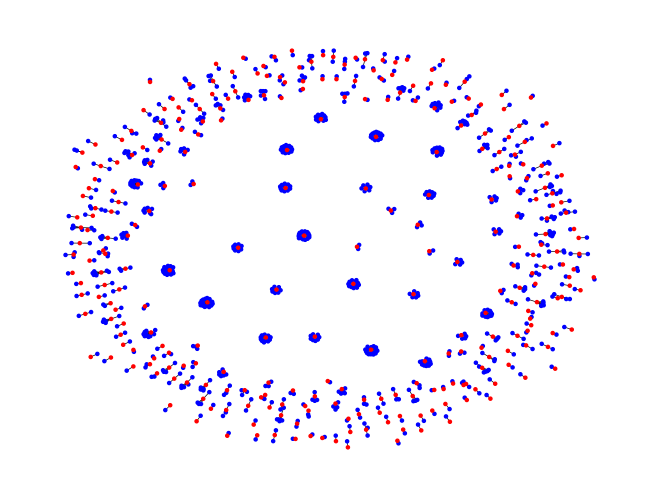

In [7]:
pos = nx.spring_layout(fifanet1)
color_dict = {0:'b',1:'r'}
color_list = [color_dict[i[1]] for i in fifanet1.nodes.data('bipartite')]
nx.draw(fifanet1, pos=pos, with_labels=False,node_size=5,width=0.5,node_color = color_list)

As you may have guessed, the clubs divide the players, so in the data we have, it is NOT possible that a player belongs to two clubs. In our example above, an actor can be in more than one movie. If you install pydot you could see this graph:

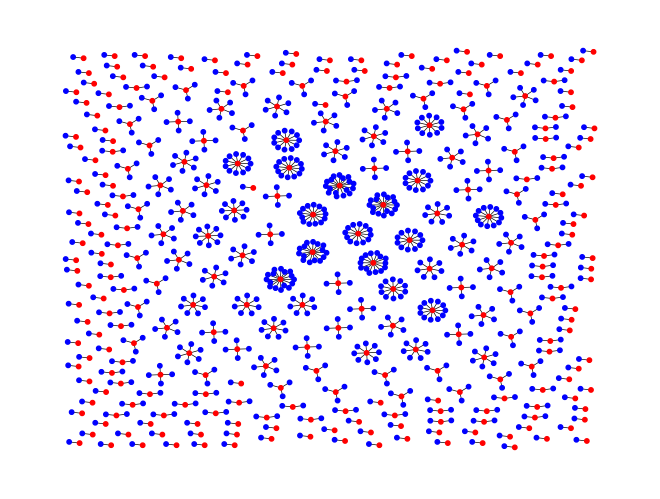

In [8]:
pos = nx.nx_pydot.graphviz_layout(fifanet1)
nx.draw(fifanet1, pos=pos, with_labels=False, node_size=10, node_color = color_list,width=0.5)

You should use another pair of columns  from 'name','club','nationality' to make a better bipartite.
Which other alternative would create the same issue as before?
Which other alternative can create an interesting bipartite? (there IS one). 

Prepare that interesting bipartite, and project its 'child' nodes (which nodes would those be?). Save the projected graph (weighted). 